In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a, b, x):
    return a * x + b

In [3]:
a = 3
b = 8
n = 30

In [4]:
x = random(n)
y = lin(a,b,x)

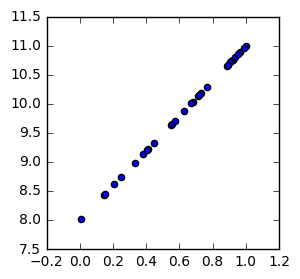

In [5]:
plt.scatter(x,y)
plt.show()

In [6]:
def sse(y, y_pred):
    return np.sqrt((y-y_pred)**2).sum()

In [7]:
def loss(y,a,b,x):
    y_pred = lin(a,b,x)
    loss = sse(y,y_pred)
    return loss

In [8]:
def avg_loss(y,a,b,x):
    return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess = 1
b_guess = 2

In [10]:
avg_loss(y,a_guess,b_guess,x)

2.6915

In [11]:
lr = 0.01

In [12]:
def update():
    global a_guess,b_guess
    y_pred = lin(a_guess,b_guess,x)
    dlossdb = 2 * (y_pred - y)
    dlossda = x * dlossdb
    a_guess -= lr * dlossda.mean()
    b_guess -= lr * dlossdb.mean()

In [13]:
# for i in range(10):
#     update()

In [14]:
# print a_guess,b_guess

In [15]:
fig = plt.figure(dpi=100,figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
# plt.show()
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10):
        update()
    return line,

In [16]:
ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

#### Linear Models in Keras

In [17]:
import numpy as np
from numpy.random import random
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD,RMSprop

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [18]:
x = random((30,2))

In [19]:
x[:5]

array([[ 0.3468,  0.706 ],
       [ 0.784 ,  0.6711],
       [ 0.8174,  0.9288],
       [ 0.346 ,  0.1118],
       [ 0.2181,  0.2667]])

In [20]:
y = np.dot(x,[2,3]) + 1
y[:5]

array([ 3.8116,  4.5815,  5.4212,  2.0273,  2.2362])

In [21]:
lm = Sequential([Dense(1, input_shape=(2,))])
lm.compile(optimizer=SGD(lr=0.1),loss='mse')

In [22]:
lm.evaluate(x,y)

30/30 [==============================] - 0s


22.8617

In [23]:
lm.fit(x,y,nb_epoch=5)

Epoch 1/5
30/30 [==============================] - 0s - loss: 22.8617
Epoch 2/5
30/30 [==============================] - 0s - loss: 10.7517
Epoch 3/5
30/30 [==============================] - 0s - loss: 5.2226
Epoch 4/5
30/30 [==============================] - 0s - loss: 2.6938
Epoch 5/5
30/30 [==============================] - 0s - loss: 1.5328


In [24]:
lm.evaluate(x,y)

30/30 [==============================] - 0s


0.9956

In [25]:
lm.get_weights()

[array([[ 0.6673],
        [ 0.7218]], dtype=float32), array([ 2.346], dtype=float32)]

In [26]:
path = '../data/redux/'
# path = '../data/redux/sample/'
model_path = path + 'models/'

In [27]:
# batch_size = 4
batch_size = 64

In [28]:
import os
if not os.path.exists(model_path): os.mkdir(model_path)

In [29]:
import utils; reload(utils)
from utils import *

import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [30]:
vgg = Vgg16()
model = vgg.model

In [31]:
batches = get_batches(path+'train',batch_size=batch_size)
val_batches = get_batches(path+'valid',batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [32]:
# trn_data = get_data(path+'train')
# val_data = get_data(path+'valid')

In [33]:
# save_array(model_path+'train_data.bc',trn_data)
# save_array(model_path+'val_data.bc',val_data)

In [34]:
trn_data = load_array(model_path+'train_data.bc')
val_data = load_array(model_path+'val_data.bc')

In [35]:
trn_data.shape

(23000, 3, 224, 224)

In [36]:
train_classes = batches.classes
val_classes = val_batches.classes
train_labels = onehot(train_classes)
val_labels = onehot(val_classes)

In [37]:
print train_classes[:4]
print train_labels[:4]

[0 0 0 0]
[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]


In [40]:
# train_features = model.predict(trn_data,batch_size=batch_size)
# val_features = model.predict(val_data,batch_size=batch_size)

In [42]:
# save_array(model_path+'train_features.dat',train_features)
# save_array(model_path+'val_features.dat',val_features)

In [47]:
train_features = load_array(model_path+'train_features.dat')
val_features = load_array(model_path+'val_features.dat')

In [48]:
train_features.shape

(23000, 1000)

In [44]:
lm = Sequential([Dense(2, activation='softmax', input_shape=(1000,))])
lm.compile(RMSprop(lr=0.1),loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
lm.fit(train_features,train_labels,nb_epoch=3,validation_data=(val_features, val_labels))

Train on 23000 samples, validate on 2000 samples
Epoch 1/3
23000/23000 [==============================] - 1s - loss: 0.0962 - acc: 0.9692 - val_loss: 0.1007 - val_acc: 0.9685
Epoch 2/3
23000/23000 [==============================] - 1s - loss: 0.0886 - acc: 0.9748 - val_loss: 0.1110 - val_acc: 0.9705
Epoch 3/3
23000/23000 [==============================] - 1s - loss: 0.0913 - acc: 0.9767 - val_loss: 0.1215 - val_acc: 0.9710


In [46]:
lm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_5 (Dense)                  (None, 2)             2002        dense_input_2[0][0]              
Total params: 2002
____________________________________________________________________________________________________
